# Exploring Relationships
**Learning Objective:** 
- Learn to subset observations
- Learn to compare variables
- Learn to group and summarise information


### Filtering Observation (Rows)

Data is messy. Most of the time you need to filter some observations (rows) from your dataset. 
- You are interested in some particular aspects of your dataset (eg. young voters). 
- The information is irrelevant and you need to remove data to avoid drawing wrong conclusions (eg. people who refuse to answer).

Therefore, you need a way to filter the observations in your dataset. 

- Relational operators provide a way to subset observations
- There are also useful methods that can help you with this.

![](https://pandas.pydata.org/docs/_images/03_subset_rows.svg)

We have seen that the data in the ANES contains values such as -8, -9, 99, that might or might not be useful depending on the probelm we want to tackle.

How can we deal with them?

Let's start with this question to illustrate:

- Are Young Voters more Liberal or Conservative?


In [1]:
# Load Pandas
import pandas as pd

# Import Data
data_url = "https://raw.githubusercontent.com/datamisc/ts-2020/main/data.csv"
anes_data  = pd.read_csv(data_url, compression='gzip')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,17,18,19,21,22,23,25,26,27,29,30,31,33,34,35,37,38,1508,1509) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Subsetting & Renaming Variables
my_vars = [
    "V201032",  # intend to vote
    "V201033",  # intend to vote for
    "V201507x", # age
    "V201200",  # liberal-conservative self-placement
]

df = anes_data[my_vars]
df.columns = ["vote", "vote_int", "age", "ideology"]

df.head()

,vote,vote_int,age,ideology
0,1,2,46,6
1,1,3,37,4
2,1,1,40,2
3,1,1,41,3
4,1,2,72,5


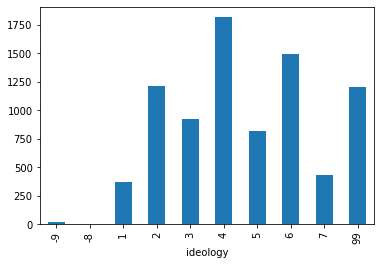

In [3]:
# How is ideology distributed?
df.value_counts('ideology').sort_index().plot(kind='bar')


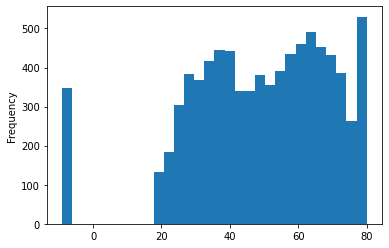

In [4]:
# How is age distributed?
df['age'].plot(kind='hist', bins=30)


In [5]:
df.describe()

,vote,vote_int,age,ideology
count,8280.000000,8280.000000,8280.000000,8280.000000
mean,0.942029,1.165097,49.038889,17.821498
std,0.721704,1.937772,20.771267,33.481452
min,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.000000,1.000000,35.000000,3.000000
50%,1.000000,1.000000,51.000000,4.000000
75%,1.000000,2.000000,65.000000,6.000000
max,2.000000,12.000000,80.000000,99.000000


We need to clean these variables a bit!

In [6]:
# Cleaning the age variable
mask = df['age'] >= 18
mask


0       True
1       True
2       True
3       True
4       True
        ... 
8275    True
8276    True
8277    True
8278    True
8279    True
Name: age, Length: 8280, dtype: bool

In [7]:
# Age seems about right now! But we lost some observations!
df[mask].describe()


,vote,vote_int,age,ideology
count,7932.000000,7932.000000,7932.000000,7932.000000
mean,0.951210,1.196672,51.585224,17.697050
std,0.655531,1.832240,17.207177,33.351305
min,-9.000000,-9.000000,18.000000,-9.000000
25%,1.000000,1.000000,37.000000,3.000000
50%,1.000000,1.000000,52.000000,4.000000
75%,1.000000,2.000000,66.000000,6.000000
max,2.000000,12.000000,80.000000,99.000000


In [8]:
# Saving the cleaned data frame with the subsetted data
df = df[mask]

In [10]:
# Cleaning Ideology
mask = (df['ideology'] >= 1) & (df['ideology'] <= 7)
mask

0        True
1        True
2        True
3        True
4        True
        ...  
8275    False
8276     True
8277     True
8278     True
8279     True
Name: ideology, Length: 7932, dtype: bool

In [11]:
df = df[mask]
df.describe()

,vote,vote_int,age,ideology
count,6778.000000,6778.000000,6778.000000,6778.000000
mean,0.934051,1.265270,51.729271,4.077456
std,0.627857,1.724711,17.132560,1.673793
min,-9.000000,-9.000000,18.000000,1.000000
25%,1.000000,1.000000,37.000000,3.000000
50%,1.000000,1.000000,52.000000,4.000000
75%,1.000000,2.000000,66.000000,6.000000
max,2.000000,12.000000,80.000000,7.000000


In [ ]:
# How is age distributed?
df['age'].plot(kind='hist', bins=30)


In [ ]:
# How is ideology distributed now?
df.value_counts('ideology').sort_index().plot(kind='bar')


### Hack-Time



In [ ]:
# Clean the `vote` variable


In [ ]:
# Clean the `vote_int` variable


## Who are young voters?

In [ ]:
# Defining Young Voters
mask = df['age'] <= 80


In [ ]:
# Who is more liberal? Who is more conservative?
print(df[mask]['ideology'].mean())
print(df[~mask]['ideology'].mean())


In [ ]:
# Did we forget something?


Could we visualise this relationship in some other way?


## Types of Data & Levels of Measurement

We have seen that there are two main types of data: Discrete and Continuous.

- **Discrete** data can only take a finite number of values.
    - eg. The number of political parties in a country.

- **Continuous** data can take an infinite number of values.
    - eg. The age of someone.



### We can further divide each of these data types into four families:

- **Nominal:** Differences of kind. There is no mathematical relationship between the values.
    - eg. Number of political parties.

- **Ordinal:** Differences of degree. There is a mathematical relationships among the values. Symbols like <, ≤, =, ≥, and > have meaning but the distance between two elements is not constant.
    - eg. Levels of education.

- **Interval:** There is a mathematical relationship among the elements and the distance between them is constant but they do not have a meaningful zero value.
    - eg. Liberal-conservative 7 point scale.

- **Ratio:** Similar to the interval variables but they have a meaningful zero value.
    - eg. Age

|          | Continuous | Discrete |
| -:       | :-:        | :-:      |
| Nominal  |            | x        |
| Ordinal  |            | x        |
| Interval | x          | x        |
| Ratio    | x          | x        |


## Continuous & Continuous



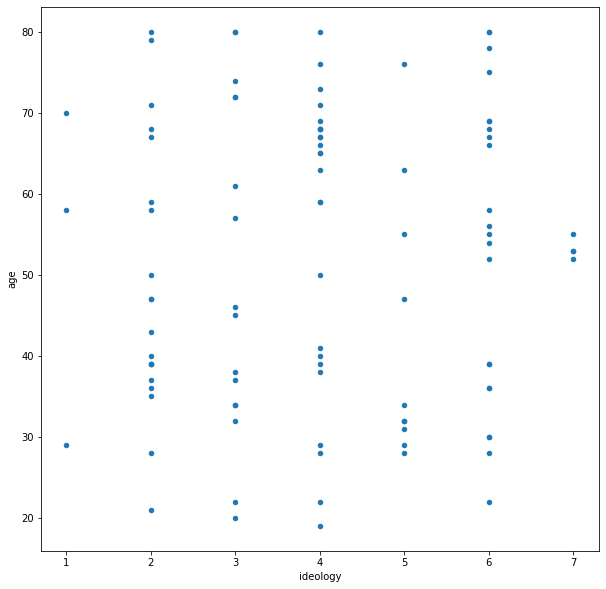

In [13]:
# What is the relationship between Age and Ideology? 
df.plot(kind='scatter', x='ideology', y='age', figsize=(10,10))


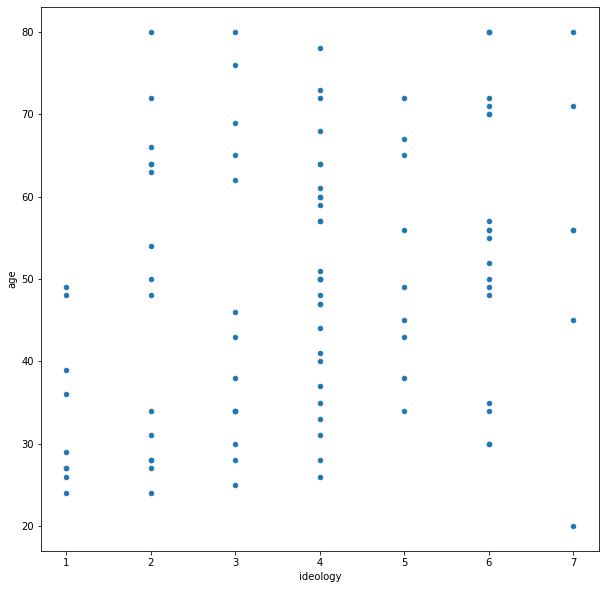

In [14]:
# We can sample some data
df.sample(100).plot(kind='scatter', x='ideology', y='age', figsize=(10,10))


In [ ]:
# We can try to add transparency
df.plot(kind='scatter', x='ideology', y='age', alpha=0.02, figsize=(10,10))


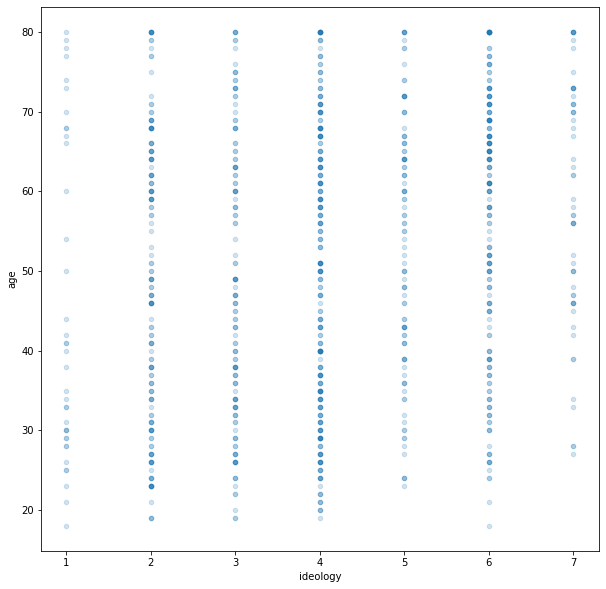

In [17]:
# We can try to add transparency
df.sample(1000).plot(kind='scatter', x='ideology', y='age', alpha=0.2, figsize=(10,10))


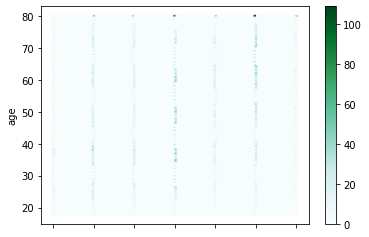

In [18]:
# Using hexbin plots
df.plot(kind='hexbin', x='ideology', y='age')

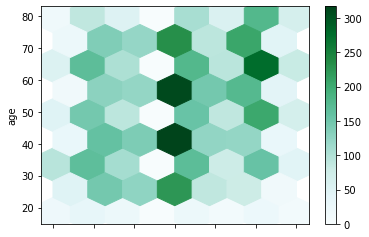

In [19]:
# Increasing the grid size
df.plot(kind='hexbin', x='ideology', y='age', gridsize=7)

## Discrete & Continuous

![](https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png)



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


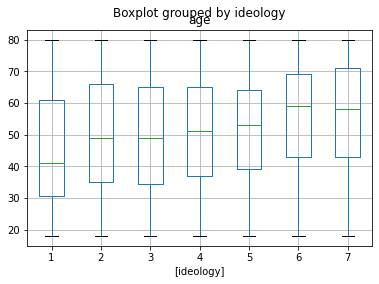

In [20]:
# Is there a relationship between Age and Ideology? 
my_vars = ['age', 'ideology']
df[my_vars].boxplot(by='ideology')


## Discrete & Discrete

### Cross tabulations

You can use the `pd.crosstab()` function to compute simple cross tabulation of two (or more) variables. 

![](

In [24]:
# Cross tabulations
pd.crosstab(df['ideology'], df['vote_int'])


vote_int,-9,-8,-1,1,2,3,4,5,11,12
ideology,,,,,,,,,,
1,0,0,34,296,13,4,6,7,0,0
2,3,0,93,1030,38,8,2,6,1,0
3,7,4,96,688,54,19,14,7,5,1
4,18,14,232,900,430,59,13,29,29,1
5,13,3,89,195,433,21,5,6,13,2
6,6,5,86,75,1233,4,3,4,13,0
7,1,0,32,7,362,3,0,2,1,0


In [28]:
# Similar to value_counts
df[my_vars].value_counts()


KeyError: ignored

In [25]:
# Absolute value don't mean much
pd.crosstab(df['ideology'], df['vote_int'], normalize=True)


vote_int,-9,-8,-1,1,2,3,4,5,11,12
ideology,,,,,,,,,,
1,0.000000,0.000000,0.005016,0.043671,0.001918,0.000590,0.000885,0.001033,0.000000,0.000000
2,0.000443,0.000000,0.013721,0.151962,0.005606,0.001180,0.000295,0.000885,0.000148,0.000000
3,0.001033,0.000590,0.014163,0.101505,0.007967,0.002803,0.002066,0.001033,0.000738,0.000148
4,0.002656,0.002066,0.034228,0.132783,0.063441,0.008705,0.001918,0.004279,0.004279,0.000148
5,0.001918,0.000443,0.013131,0.028770,0.063883,0.003098,0.000738,0.000885,0.001918,0.000295
6,0.000885,0.000738,0.012688,0.011065,0.181912,0.000590,0.000443,0.000590,0.001918,0.000000
7,0.000148,0.000000,0.004721,0.001033,0.053408,0.000443,0.000000,0.000295,0.000148,0.000000


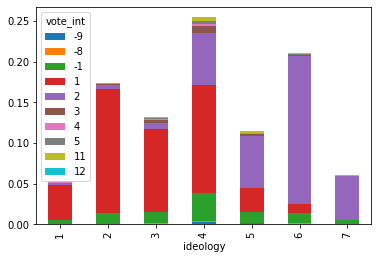

In [23]:
# Making a plot
pd.crosstab(df['ideology'], df['vote_int'], normalize=True).plot(kind='bar', stacked=True)
